# QSAR - Blood brain barrier permeability of compounds

Adapted from Maria Matveieva, Pavel Polishchuk paper

In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 2.7 MB/s eta 0:00:0000:0100:01


In [3]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors

import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
import joblib

In [4]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

## 2. Reading molecules and activity from SDF

In [13]:
fname = "logBB.sdf"
mols = []
y = []
for mol in Chem.SDMolSupplier(fname):
    if mol is not None:
        mols.append(mol)
        y.append(mol.GetIntProp('logBB_class'))

[15:03:53] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[15:03:53] ERROR: Could not sanitize molecule ending on line 3192
[15:03:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
[15:03:53] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[15:03:53] ERROR: Could not sanitize molecule ending on line 4541
[15:03:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[15:03:53] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[15:03:53] ERROR: Could not sanitize molecule ending on line 5314
[15:03:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[15:03:53] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[15:03:53] ERROR: Could not sanitize molecule ending on line 7252
[15:03:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 15 16 17 18
[15:03:53] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 14 15
[15:03:53] ERROR

In [14]:
len(y)

299

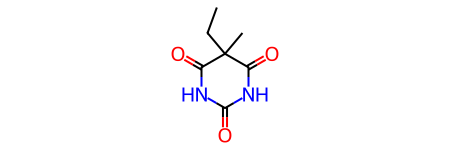

In [17]:
mols[41]

In [19]:
!pip install nglview

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server-2.14.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_events-0.10.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached prometheus_client-0.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 k

In [21]:
# import nglview as nv
# view = nv.show_file('confg1.gro')
# view

## 3. Calculate Descriptors (fingerprints)

In [22]:
fp = []
for m in mols:
    fp.append(AllChem.GetMorganFingerprintAsBitVect(m, 2))

[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerator
[15:06:11] DEPRECATION WARNING: please use MorganGenerat

In [23]:
print("Fingerprint of the first molecule:")
print(list(fp[0]))

Fingerprint of the first molecule:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## 4. Converting fingerprints to 2D np.array

In [24]:
def rdkit_numpy_convert(fp):
    output = []
    for f in fp:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(f, arr)
        output.append(arr)
    return np.asarray(output)

In [27]:
x = rdkit_numpy_convert(fp)
x.shape

(299, 2048)

## 5. Split the whole set to training and test sets

In [37]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, shuffle=True)

In [38]:
print(len(y_tr))

239


## 6. Scale x
Important for modeling approaches like SVM. In the case of binary fingerprint, it may be less useful

In [39]:
scale = StandardScaler().fit(x_tr)
x_tr = scale.transform(x_tr)

In [40]:
joblib.dump(scale, "logBB_scale.pkl", compress=3)

['logBB_scale.pkl']

## 7. Create 5 fols for cross-validation

In [43]:
cv = StratifiedKFold(n_splits=5)

In [44]:
for i, (train_index, test_index) in enumerate(cv.split(x_tr, y_tr)):
    print("\nFold_"+str(i+1))
    print("TRAIN:", train_index)
    print("TEST:", test_index)


Fold_1
TRAIN: [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238]
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]

Fold_2
TRAIN: [  0   1   2   3   4   5   6   7   8   9 

## 8. Generate RF Model: Optimal tuning of parameters and build model

In [47]:
param_grid = {
    "max_features": [x_tr.shape[1] // 10, x_tr.shape[1] // 7, x_tr.shape[1] // 5],
    "n_estimators": [100, 250, 500]
}

In [48]:
m = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=2)

In [49]:
m.fit(x_tr, y_tr)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': [204, 292, 409],
                         'n_estimators': [100, 250, 500]})

In [50]:
joblib.dump(m, "logBB_rf_morgan.pkl", compress=3)

['logBB_rf_morgan.pkl']

## 9. Predict test set compounds anc calculate performance

In [51]:
scale = joblib.load("logBB_scale.pkl")

In [52]:
x_ts = scale.transform(x_ts)

In [53]:
pred_rf = m.predict(x_ts)

In [55]:
pred_rf

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [57]:
accuracy_score(y_ts, pred_rf)

0.85

In [58]:
matthews_corrcoef(y_ts, pred_rf)

0.6857339868096689

In [59]:
cohen_kappa_score(y_ts, pred_rf)

0.6853146853146853

## 10. Estimation of Applicability Domain

In [60]:
pred_prob = m.predict_proba(x_ts)

In [61]:
pred_prob

array([[0.19, 0.81],
       [0.01, 0.99],
       [0.09, 0.91],
       [0.72, 0.28],
       [0.32, 0.68],
       [0.63, 0.37],
       [0.04, 0.96],
       [0.56, 0.44],
       [0.  , 1.  ],
       [0.64, 0.36],
       [0.22, 0.78],
       [0.4 , 0.6 ],
       [0.35, 0.65],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.36, 0.64],
       [0.73, 0.27],
       [0.21, 0.79],
       [0.4 , 0.6 ],
       [0.35, 0.65],
       [0.05, 0.95],
       [0.82, 0.18],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.87, 0.13],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.19, 0.81],
       [0.46, 0.54],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.16, 0.84],
       [0.94, 0.06],
       [0.12, 0.88],
       [0.16, 0.84],
       [0.66, 0.34],
       [0.77, 0.23],
       [0.72, 0.28],
       [0.66, 0.34],
       [0.09, 0.91],
       [0.18, 0.82],
       [0.83, 0.17],
       [0.12, 0.88],
       [0.67, 0.33],
       [0.87, 0.13],
       [0.83, 0.17],
       [0.03,

## 11. Build SVM model

In [62]:
param_grid = {"C": [10**i for i in range(0,5)],
              "gamma": [10**i for i in range(-6,0)]}

In [64]:
svm = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid)

In [65]:
svm.fit(x_tr, y_tr)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]})

## 12. Predict LogBB for test set

In [66]:
pred_svm = svm.predict(x_ts)

In [67]:
pred_svm

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

## 13. Analysis of Applicability Domain

In [68]:
pred_prob = svm.predict_proba(x_ts)

In [70]:
threshold = 0.1
da = np.amax(pred_prob, axis=1) > threshold